In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

# 1. 📷 ЗАГРУЗКА ИЗОБРАЖЕНИЯ

✅ Изображение успешно загружено!
   Размер: (400, 600)
   Диапазон яркостей: [0, 255]
   Средняя яркость: 74.94
   Стандартное отклонение: 43.66


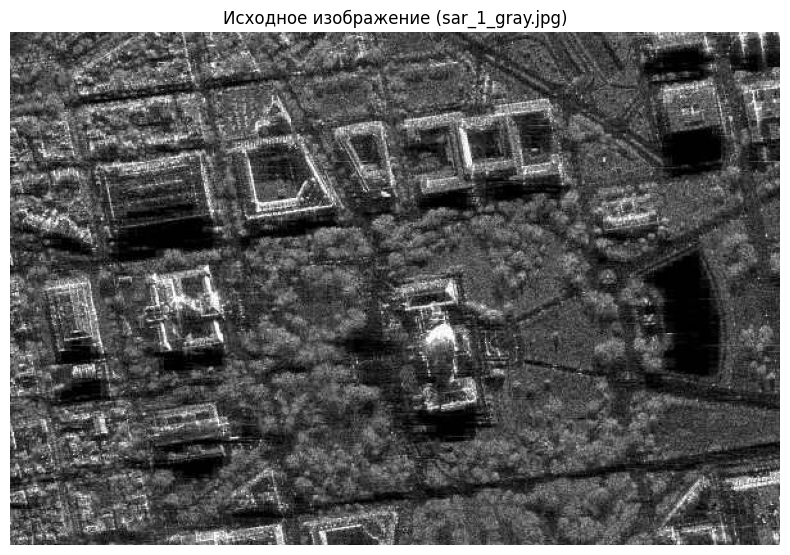

In [9]:
image = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("❌ ОШИБКА: Файл 'sar_1_gray.jpg' не найден!")
else:
    print("✅ Изображение успешно загружено!")
    print(f"   Размер: {image.shape}")
    print(f"   Диапазон яркостей: [{image.min()}, {image.max()}]")
    print(f"   Средняя яркость: {image.mean():.2f}")
    print(f"   Стандартное отклонение: {image.std():.2f}")

    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap='gray')
    plt.title('Исходное изображение (sar_1_gray.jpg)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# 2. 📊 ПОСТРОЕНИЕ ГИСТОГРАММЫ

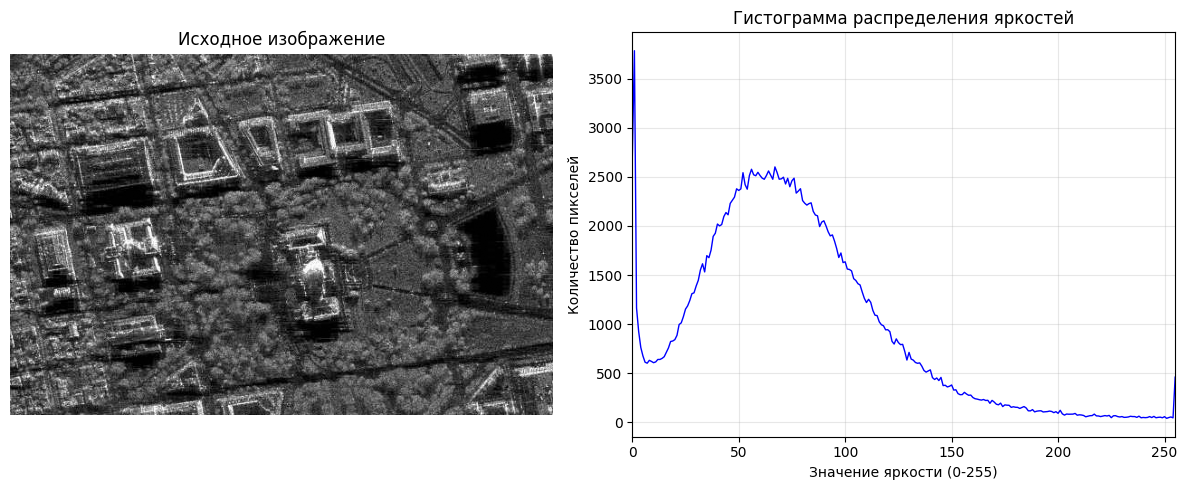

✅ Гистограмма построена!


In [10]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(hist, color='blue', linewidth=1)
plt.title('Гистограмма распределения яркостей')
plt.xlabel('Значение яркости (0-255)')
plt.ylabel('Количество пикселей')
plt.grid(True, alpha=0.3)
plt.xlim([0, 255])

plt.tight_layout()
plt.show()

print("✅ Гистограмма построена!")

# 3. 🌟 ГАММА-КОРРЕКЦИЯ

✅ Гамма-коррекция применена!
   γ = 0.5 (осветление): средняя яркость = 130.56
   γ = 2.0 (затемнение): средняя яркость = 29.07


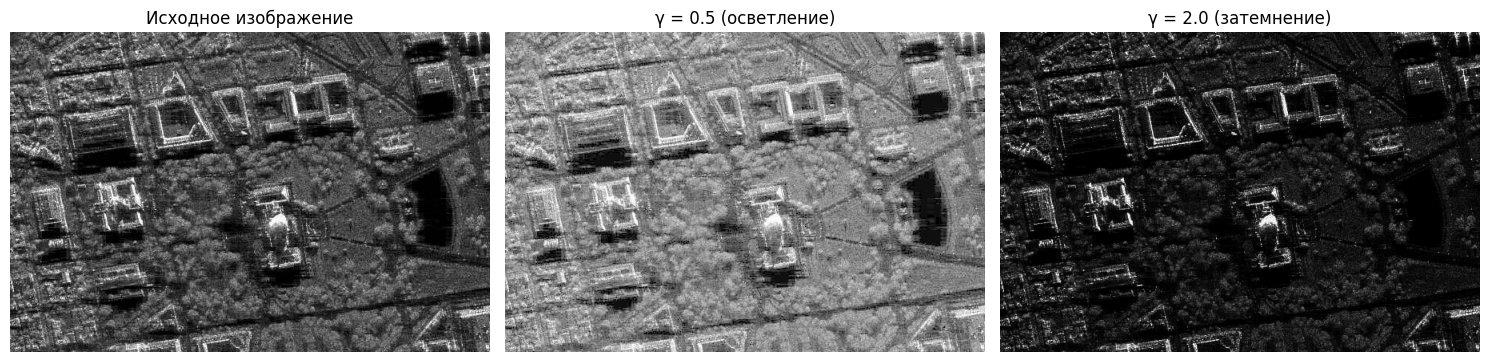

In [11]:
def gamma_correct(img, gamma):
    normalized = img.astype(float) / 255.0
    corrected = np.power(normalized, gamma)
    return (corrected * 255).astype(np.uint8)

# γ < 1 и γ > 1
gamma_low = 0.5  # Осветление
gamma_high = 2.0  # Затемнение

corrected_low = gamma_correct(image, gamma_low)
corrected_high = gamma_correct(image, gamma_high)

print("✅ Гамма-коррекция применена!")
print(f"   γ = {gamma_low} (осветление): средняя яркость = {corrected_low.mean():.2f}")
print(f"   γ = {gamma_high} (затемнение): средняя яркость = {corrected_high.mean():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(corrected_low, cmap='gray')
plt.title(f'γ = {gamma_low} (осветление)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(corrected_high, cmap='gray')
plt.title(f'γ = {gamma_high} (затемнение)')
plt.axis('off')

plt.tight_layout()
plt.show()

# 4. 📈 СРАВНЕНИЕ ИЗОБРАЖЕНИЙ (MSE, SSIM)

In [12]:
mse_low = mean_squared_error(image, corrected_low)
mse_high = mean_squared_error(image, corrected_high)
ssim_low = structural_similarity(image, corrected_low)
ssim_high = structural_similarity(image, corrected_high)

print("📊 РЕЗУЛЬТАТЫ СРАВНЕНИЯ:")
print("   Метрики для γ = 0.5 (осветление):")
print(f"   - MSE:  {mse_low:10.2f}")
print(f"   - SSIM: {ssim_low:10.4f}")

print("\n   Метрики для γ = 2.0 (затемнение):")
print(f"   - MSE:  {mse_high:10.2f}")
print(f"   - SSIM: {ssim_high:10.4f}")

print("\n   Пояснение метрик:")
print("   - MSE (Mean Squared Error): чем меньше, тем больше похожи изображения")
print("   - SSIM (Structural Similarity): от -1 до 1, чем ближе к 1, тем больше похожи")

📊 РЕЗУЛЬТАТЫ СРАВНЕНИЯ:
   Метрики для γ = 0.5 (осветление):
   - MSE:     3250.43
   - SSIM:     0.7875

   Метрики для γ = 2.0 (затемнение):
   - MSE:     2383.76
   - SSIM:     0.5270

   Пояснение метрик:
   - MSE (Mean Squared Error): чем меньше, тем больше похожи изображения
   - SSIM (Structural Similarity): от -1 до 1, чем ближе к 1, тем больше похожи


# 5. ⚖️ СТАТИСТИЧЕСКАЯ ЦВЕТОКОРРЕКЦИЯ

✅ Статистическая коррекция выполнена!

   Статистические характеристики:
   Исходное изображение:
   - Среднее (μ):    74.94
   - Стандартное отклонение (σ):    43.66

   Целевое изображение (выравнивание гистограммы):
   - Среднее (μ):   127.03
   - Стандартное отклонение (σ):    74.27

   После статистической коррекции:
   - Среднее (μ):   123.12
   - Стандартное отклонение (σ):    65.30


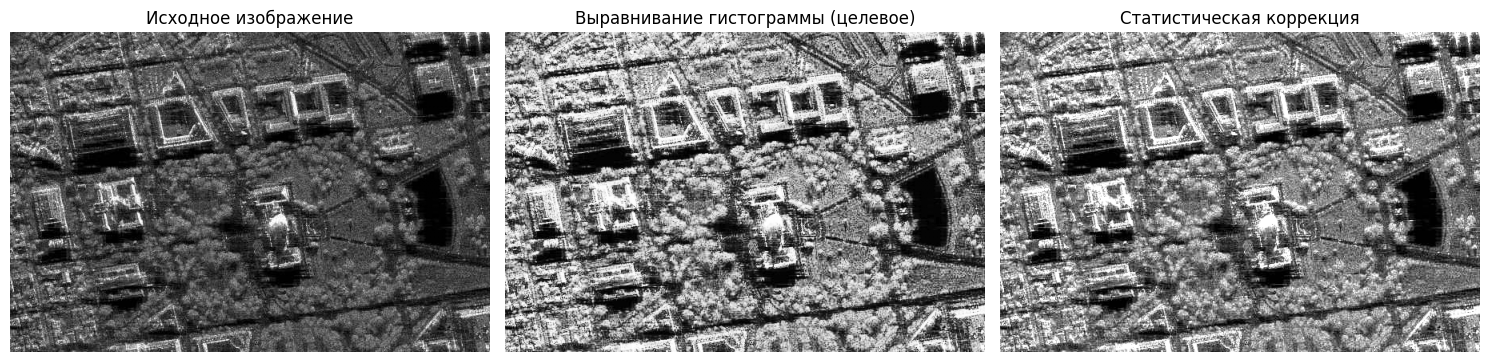

In [13]:
def stat_correct(source, target):
    src_mean = source.mean()
    src_std = source.std()
    tgt_mean = target.mean()
    tgt_std = target.std()

    if src_std == 0:
        src_std = 1

    corrected = (source - src_mean) * (tgt_std / src_std) + tgt_mean
    return np.clip(corrected, 0, 255).astype(np.uint8)

# Целевое изображение - выравненная гистограмма
eq_image = cv2.equalizeHist(image)

# Применяем статистическую коррекцию
stat_image = stat_correct(image, eq_image)

print("✅ Статистическая коррекция выполнена!")
print("\n   Статистические характеристики:")
print(f"   Исходное изображение:")
print(f"   - Среднее (μ): {image.mean():8.2f}")
print(f"   - Стандартное отклонение (σ): {image.std():8.2f}")

print(f"\n   Целевое изображение (выравнивание гистограммы):")
print(f"   - Среднее (μ): {eq_image.mean():8.2f}")
print(f"   - Стандартное отклонение (σ): {eq_image.std():8.2f}")

print(f"\n   После статистической коррекции:")
print(f"   - Среднее (μ): {stat_image.mean():8.2f}")
print(f"   - Стандартное отклонение (σ): {stat_image.std():8.2f}")

# Визуализация
plt.figure(figsize=(15, 5))

images_to_show = [image, eq_image, stat_image]
titles = [
    'Исходное изображение',
    'Выравнивание гистограммы (целевое)',
    'Статистическая коррекция'
]

for i, (img, title) in enumerate(zip(images_to_show, titles)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

# 6. 🔲 ПОРОГОВАЯ ФИЛЬТРАЦИЯ

🔧 Бинарная пороговая обработка:
   Порог 100:  23.2% белых пикселей
   Порог 150:   5.5% белых пикселей
   Порог 200:   1.6% белых пикселей
   Адаптивный:  49.1% белых пикселей
   Оцу:         35.0% белых пикселей (авто порог = 85.0)


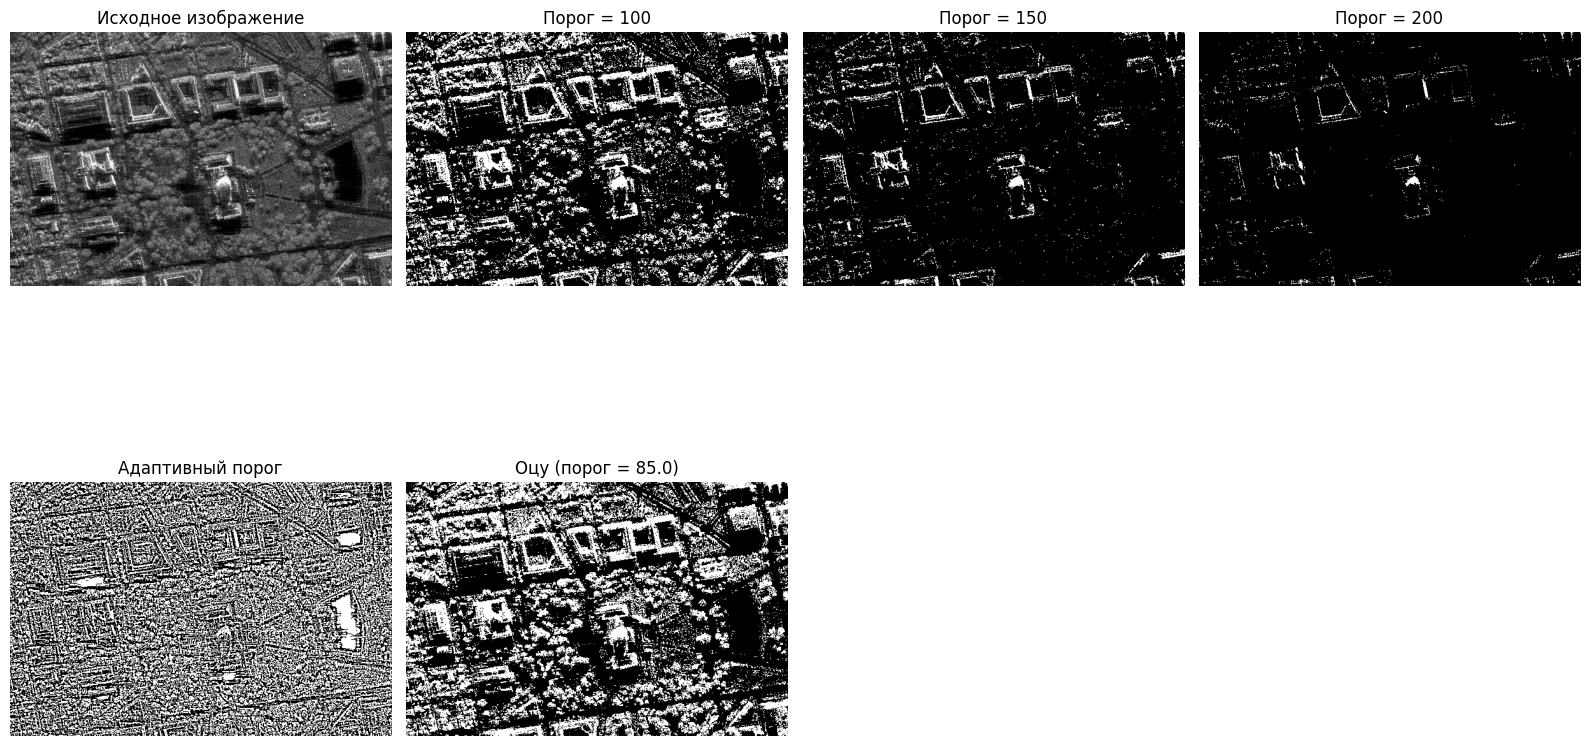

In [14]:
# Различные пороги для тестирования
thresholds = [100, 150, 200]
binary_images = []

print("🔧 Бинарная пороговая обработка:")
for thresh in thresholds:
    _, binary = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
    binary_images.append(binary)
    
    # Статистика
    white_pixels = np.sum(binary == 255)
    total_pixels = binary.size
    white_percent = (white_pixels / total_pixels) * 100
    
    print(f"   Порог {thresh:3d}: {white_percent:5.1f}% белых пикселей")

# Адаптивная пороговая обработка
adaptive = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 11, 2
)
binary_images.append(adaptive)

adaptive_white = np.sum(adaptive == 255)
adaptive_percent = (adaptive_white / adaptive.size) * 100
print(f"   Адаптивный: {adaptive_percent:5.1f}% белых пикселей")

# Автоматический порог по методу Оцу
otsu_thresh, otsu_binary = cv2.threshold(
    image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
binary_images.append(otsu_binary)

otsu_white = np.sum(otsu_binary == 255)
otsu_percent = (otsu_white / otsu_binary.size) * 100
print(f"   Оцу:        {otsu_percent:5.1f}% белых пикселей (авто порог = {otsu_thresh:.1f})")

# Визуализация
plt.figure(figsize=(16, 10))

# Исходное изображение
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Бинарные пороги
titles = [f'Порог = {t}' for t in thresholds] + ['Адаптивный порог', f'Оцу (порог = {otsu_thresh:.1f})']

for i, (bin_img, title) in enumerate(zip(binary_images, titles)):
    plt.subplot(2, 4, i + 2)
    plt.imshow(bin_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()